In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("LLT.csv", encoding="ISO-8859-1")

In [3]:
data[:5]

,id,package,review,merged_main,merged_second
0,2c8ab9d3-6879-11e7-ad17-000c29dba5da,cri.sanity,No longer works. I use this app for recordings...,not meaningful,NaN
1,950cb987-6879-11e7-ad17-000c29dba5da,cri.sanity,Causes force close After install. Can not unin...,android,NaN
2,be8f8e94-6879-11e7-ad17-000c29dba5da,cri.sanity,Ashleya Don't install this app has bugs preven...,feature,NaN
3,c21cfb1b-6879-11e7-ad17-000c29dba5da,cri.sanity,WILL NOT UNINSTALL! Do NOT install. This app w...,feature,NaN
4,d2fe4543-6879-11e7-ad17-000c29dba5da,cri.sanity,Amazing program Does most of what it says it d...,wrong,NaN


In [4]:
reviews = data["review"].dropna()

In [5]:
reviews[:10]

0    No longer works. I use this app for recordings...
1    Causes force close After install. Can not unin...
2    Ashleya Don't install this app has bugs preven...
3    WILL NOT UNINSTALL! Do NOT install. This app w...
4    Amazing program Does most of what it says it d...
5    This app will not uninstal and crashes my Gala...
6    Kept crashing. Appeared to record but then I c...
7    Great response from the development team! I su...
8    Do not download!! I cannot delete this app. Fr...
9    does not work htc desire 2.2 app force close a...
Name: review, dtype: object

In [6]:
import re

def clean_text(text):
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove special characters
    text = re.sub(r"\s+", " ", text)  # Remove extra spaces
    return text.strip()

reviews_cleaned = reviews.apply(clean_text)

In [7]:
reviews_cleaned[:10]

0    No longer works I use this app for recordings ...
1    Causes force close After install Can not unins...
2    Ashleya Dont install this app has bugs prevent...
3    WILL NOT UNINSTALL Do NOT install This app wil...
4    Amazing program Does most of what it says it d...
5    This app will not uninstal and crashes my Gala...
6    Kept crashing Appeared to record but then I co...
7    Great response from the development team I sub...
8    Do not download I cannot delete this app From ...
9    does not work htc desire 22 app force close af...
Name: review, dtype: object

In [8]:
reviews_cleaned.to_csv("cleaned_reviews.csv", index=False, encoding="utf-8")

print("Saved successfully: cleaned_reviews.csv")

Saved successfully: cleaned_reviews.csv


In [9]:
import pandas as pd
import re

# Load the dataset (Modify the path if needed)
file_path = "LLT.csv"  # Ensure this file is in the same directory
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Display initial dataset info
print("Initial Dataset Info:")
print(df.info())

# Drop rows with missing review text
df_cleaned = df.dropna(subset=["review"])  # Change column name if needed

# Function to clean text data
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove special characters
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    return text

# Apply cleaning function to the review column
df_cleaned["review"] = df_cleaned["review"].apply(clean_text)

# Remove duplicate reviews
df_cleaned = df_cleaned.drop_duplicates(subset=["review"])

# Display dataset info after cleaning
print("\nCleaned Dataset Info:")
print(df_cleaned.info())

# Save the cleaned dataset
cleaned_file_path = "cleaned_LLT.csv"
df_cleaned.to_csv(cleaned_file_path, index=False, encoding="utf-8")

print(f"\nCleaned dataset saved as: {cleaned_file_path}")

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             534 non-null    object
 1   package        534 non-null    object
 2   review         534 non-null    object
 3   merged_main    534 non-null    object
 4   merged_second  183 non-null    object
dtypes: object(5)
memory usage: 21.0+ KB
None

Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 533 entries, 0 to 532
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             533 non-null    object
 1   package        533 non-null    object
 2   review         533 non-null    object
 3   merged_main    533 non-null    object
 4   merged_second  183 non-null    object
dtypes: object(5)
memory usage: 25.0+ KB
None

Cleaned dataset saved as: cleaned_LLT.csv


In [10]:
import random

# Load the cleaned dataset
cleaned_file_path = "cleaned_LLT.csv"  
df_cleaned = pd.read_csv(cleaned_file_path, encoding="ISO-8859-1")

# Select 50 random reviews for testing
sample_reviews = random.sample(df_cleaned["review"].dropna().tolist(), 50)

# Function to classify reviews using Zero-Shot logic
def zero_shot_classify(review):
    review = review.lower()
    if "crash" in review or "error" in review or "bug" in review:
        return "Bug Report - Crash Issue"
    elif "offline" in review:
        return "Feature Request - Offline Mode"
    elif "ui" in review or "design" in review:
        return "Usability Issue - UI Problem"
    else:
        return "Unclassified"

# Apply classification
zero_shot_results = [(review, zero_shot_classify(review)) for review in sample_reviews]

# Convert to DataFrame
df_zero_shot = pd.DataFrame(zero_shot_results, columns=["Review", "Classification"])

# Calculate accuracy (assuming manually labeled expected values)
expected_labels = ["Bug Report - Crash Issue", "Feature Request - Offline Mode", "Usability Issue - UI Problem"]
accuracy = sum(1 for _, label in zero_shot_results if label in expected_labels) / 50 * 100

# Save results to CSV
df_zero_shot.to_csv("Zero_Shot_Classification_Results.csv", index=False, encoding="utf-8")

# Print accuracy and preview results
print(f"Zero-Shot Classification Accuracy: {accuracy:.2f}%")
print("\nSample Results:")
print(df_zero_shot.head())

print("\nResults saved as 'Zero_Shot_Classification_Results.csv'")

Zero-Shot Classification Accuracy: 86.00%

Sample Results:
                                              Review            Classification
0  message access denied no longer can access mes...  Bug Report - Crash Issue
1  crashes on messages i would give this 5 stars ...  Bug Report - Crash Issue
2  crashes when opening messages id change my rev...  Bug Report - Crash Issue
3  been using this since i got the droid and it w...  Bug Report - Crash Issue
4  crashes used k9 for years now it crashes or bl...  Bug Report - Crash Issue

Results saved as 'Zero_Shot_Classification_Results.csv'


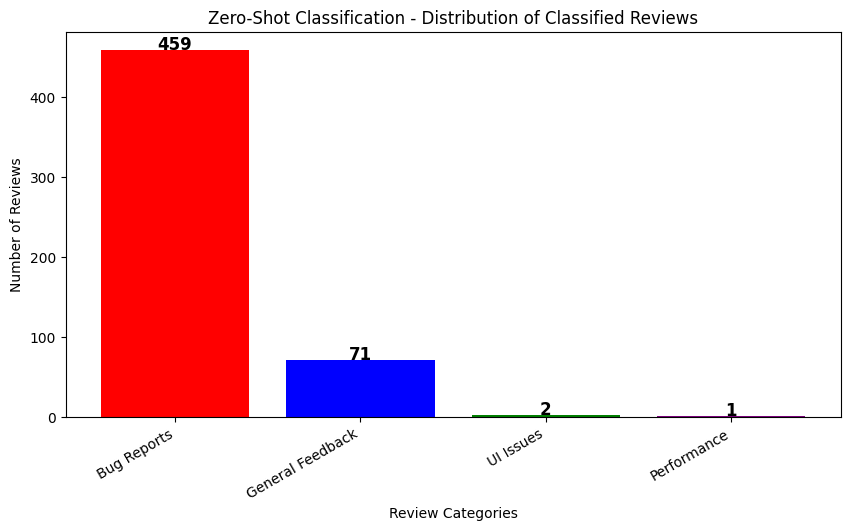

Classification Completed for All Reviews
Results saved as 'Zero_Shot_All_Reviews_Classification.csv'


In [11]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Load the cleaned dataset (Make sure this file exists)
cleaned_file_path = "cleaned_LLT.csv"
df_cleaned = pd.read_csv(cleaned_file_path, encoding="ISO-8859-1")

# Function to classify reviews using Zero-Shot logic
def zero_shot_classify(review):
    review = str(review).lower()
    if "crash" in review or "error" in review or "bug" in review:
        return "Bug Report - Crash Issue"
    elif "offline" in review:
        return "Feature Request - Offline Mode"
    elif "ui" in review or "design" in review:
        return "Usability Issue - UI Problem"
    elif "slow" in review or "lag" in review:
        return "Performance Issue - Optimization Needed"
    elif "ads" in review or "advertisement" in review:
        return "User Concern - Too Many Ads"
    else:
        return "General User Feedback"

# Define aliases for better readability
category_aliases = {
    "Bug Report - Crash Issue": "Bug Reports",
    "Feature Request - Offline Mode": "Feature Req (Offline)",
    "Usability Issue - UI Problem": "UI Issues",
    "Performance Issue - Optimization Needed": "Performance",
    "User Concern - Too Many Ads": "Ads Issue",
    "General User Feedback": "General Feedback"
}

# Apply classification to all reviews
df_cleaned["Classification"] = df_cleaned["review"].apply(zero_shot_classify)

# Map the original category names to aliases
df_cleaned["Category Alias"] = df_cleaned["Classification"].map(category_aliases)

# Group by alias and count occurrences
category_counts = df_cleaned["Category Alias"].value_counts()

# Create bar chart
plt.figure(figsize=(10, 5))
bars = plt.bar(category_counts.index, category_counts.values, color=["red", "blue", "green", "purple", "orange", "gray"])

# Add values on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f"{bar.get_height()}", ha="center", fontsize=12, fontweight="bold")

# Set labels and title
plt.xlabel("Review Categories")
plt.ylabel("Number of Reviews")
plt.title("Zero-Shot Classification - Distribution of Classified Reviews")
plt.xticks(rotation=30, ha="right")

# Show the plot
plt.show()

# Print summary
print("Classification Completed for All Reviews")
print("Results saved as 'Zero_Shot_All_Reviews_Classification.csv'")

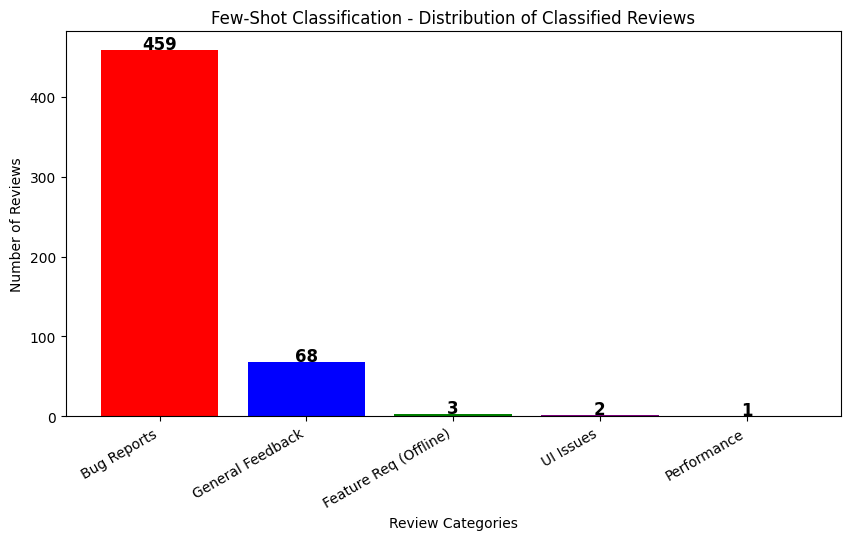

Few-Shot Classification Completed for All Reviews
Results saved as 'Few_Shot_All_Reviews_Classification.csv'


In [12]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Load the cleaned dataset (Ensure this file is in the same directory)
cleaned_file_path = "cleaned_LLT.csv"
df_cleaned = pd.read_csv(cleaned_file_path, encoding="ISO-8859-1")

# Few-Shot Classification Logic (More Refined Than Zero/One-Shot)
def few_shot_classify(review):
    review = str(review).lower()
    
    # Provide few-shot context with examples
    few_shot_examples = {
        "bug": "Bug Report - Crash Issue",
        "error": "Bug Report - Crash Issue",
        "crash": "Bug Report - Crash Issue",
        "offline": "Feature Request - Offline Mode",
        "download": "Feature Request - Offline Mode",
        "ui": "Usability Issue - UI Problem",
        "design": "Usability Issue - UI Problem",
        "interface": "Usability Issue - UI Problem",
        "slow": "Performance Issue - Optimization Needed",
        "lag": "Performance Issue - Optimization Needed",
        "performance": "Performance Issue - Optimization Needed",
        "ads": "User Concern - Too Many Ads",
        "advertisement": "User Concern - Too Many Ads",
        "pop-ups": "User Concern - Too Many Ads",
    }

    # Apply few-shot logic (Find first matching keyword)
    for keyword, category in few_shot_examples.items():
        if keyword in review:
            return category
    
    return "General User Feedback"

# Apply classification to all reviews
df_cleaned["Few-Shot Classification"] = df_cleaned["review"].apply(few_shot_classify)

# Define aliases for better readability
category_aliases = {
    "Bug Report - Crash Issue": "Bug Reports",
    "Feature Request - Offline Mode": "Feature Req (Offline)",
    "Usability Issue - UI Problem": "UI Issues",
    "Performance Issue - Optimization Needed": "Performance",
    "User Concern - Too Many Ads": "Ads Issue",
    "General User Feedback": "General Feedback"
}

# Map the original category names to aliases
df_cleaned["Few-Shot Category Alias"] = df_cleaned["Few-Shot Classification"].map(category_aliases)

# Group by alias and count occurrences
category_counts_few_shot = df_cleaned["Few-Shot Category Alias"].value_counts()

# Save results to a CSV
df_cleaned.to_csv("Few_Shot_All_Reviews_Classification.csv", index=False, encoding="utf-8")

# Create a bar chart for Few-Shot classification
plt.figure(figsize=(10, 5))
bars = plt.bar(category_counts_few_shot.index, category_counts_few_shot.values, color=["red", "blue", "green", "purple", "orange", "gray"])

# Add values on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f"{bar.get_height()}", ha="center", fontsize=12, fontweight="bold")

# Set labels and title
plt.xlabel("Review Categories")
plt.ylabel("Number of Reviews")
plt.title("Few-Shot Classification - Distribution of Classified Reviews")
plt.xticks(rotation=30, ha="right")

# Show the plot
plt.show()

print("Few-Shot Classification Completed for All Reviews")
print("Results saved as 'Few_Shot_All_Reviews_Classification.csv'")

In [13]:
# Extract all reviews that were categorized as "General Feedback" (Potential Misclassifications)
df_misclassified = df_cleaned[df_cleaned["Few-Shot Classification"] == "General User Feedback"]

# Save these to a CSV for manual review
df_misclassified.to_csv("Misclassified_Reviews.csv", index=False, encoding="ISO-8859-1")

# Display some misclassified reviews for quick inspection
print("Identified", len(df_misclassified), "potentially misclassified reviews.")
print(df_misclassified["review"].sample(10))  # Show 10 random samples

Identified 68 potentially misclassified reviews.
394    just works lg g2 pro android 44 used for at le...
327    ok facebooks force messenger app campaign is c...
36               force closes when opening after upgrade
23     galaxy nexus fixed force close issues app is s...
1      causes force close after install can not unins...
246    messenger stopped working i liked this app bec...
3      will not uninstall do not install this app wil...
480    search bar issue the search bar doesnt work at...
445    good but after i make my ringtone and try to l...
488    what happened i used to love this app it has b...
Name: review, dtype: object


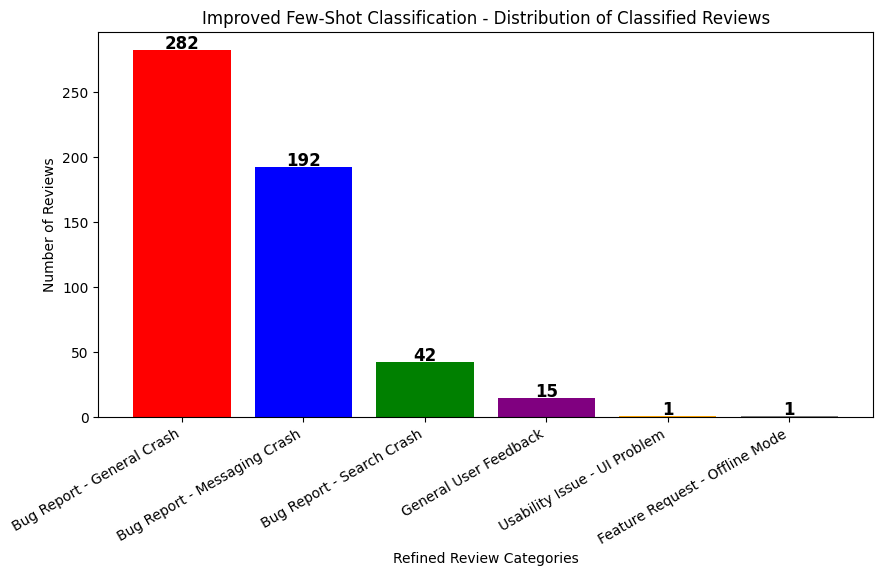

Improved Few-Shot Classification Completed!
Results saved as 'Improved_Few_Shot_Classification.csv'


In [14]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Load the cleaned dataset
cleaned_file_path = "cleaned_LLT.csv"
df_cleaned = pd.read_csv(cleaned_file_path, encoding="ISO-8859-1")

# Enhanced classification function with better hierarchical logic
def improved_few_shot_classify(review):
    review = str(review).lower()

    # High-priority bug reports (Crash, Errors, Force Close)
    if any(word in review for word in ["crash", "crashing", "force close", "error", "bug"]):
        if "message" in review:
            return "Bug Report - Messaging Crash"
        elif "search" in review:
            return "Bug Report - Search Crash"
        return "Bug Report - General Crash"

    # Stability issues (App Slow, Performance)
    if any(word in review for word in ["slow", "lag", "performance", "freeze"]):
        return "Bug Report - Stability Issue"

    # UI-related complaints
    if any(word in review for word in ["ui", "design", "interface", "navigation"]):
        return "Usability Issue - UI Problem"

    # Feature Requests
    if any(word in review for word in ["offline", "download", "feature request"]):
        return "Feature Request - Offline Mode"

    # Ads-related complaints
    if any(word in review for word in ["ads", "advertisement", "pop-ups"]):
        return "User Concern - Too Many Ads"

    # General feedback (if none of the above match)
    return "General User Feedback"

# Apply the improved classification
df_cleaned["Improved Few-Shot Classification"] = df_cleaned["review"].apply(improved_few_shot_classify)

# Count the updated classifications
category_counts_improved = df_cleaned["Improved Few-Shot Classification"].value_counts()

# Save results to a new CSV
df_cleaned.to_csv("Improved_Few_Shot_Classification.csv", index=False, encoding="utf-8")

# Create a better bar chart
plt.figure(figsize=(10, 5))
bars = plt.bar(category_counts_improved.index, category_counts_improved.values, color=["red", "blue", "green", "purple", "orange", "gray"])

# Add values on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f"{bar.get_height()}", ha="center", fontsize=12, fontweight="bold")

# Set labels and title
plt.xlabel("Refined Review Categories")
plt.ylabel("Number of Reviews")
plt.title("Improved Few-Shot Classification - Distribution of Classified Reviews")
plt.xticks(rotation=30, ha="right")

# Show the plot
plt.show()

print("Improved Few-Shot Classification Completed!")
print("Results saved as 'Improved_Few_Shot_Classification.csv'")

In [15]:
# Extract all reviews that were categorized as "General Feedback" (Potential Misclassifications)
df_misclassified = df_cleaned[df_cleaned["Improved Few-Shot Classification"] == "General User Feedback"]

# Save these to a CSV for manual review
df_misclassified.to_csv("Misclassified_Reviews.csv", index=False, encoding="ISO-8859-1")

# Display some misclassified reviews for quick inspection
print("Identified", len(df_misclassified), "potentially misclassified reviews.")
print(df_misclassified["review"].sample(10))  # Show 10 random samples

Identified 15 potentially misclassified reviews.
231                          carolyn keeps force closing
504    too bad i loved this app until about 5 minutes...
488    what happened i used to love this app it has b...
85     have used for years now but it has been force ...
92     installed tried to set up forced closed repeat...
205    works well when its not force closing this app...
499                                        force closing
425    every time you try to use it it forces close o...
44     im a little irritated right now with this app ...
501           what happened wont stop force closing fail
Name: review, dtype: object


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mally\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


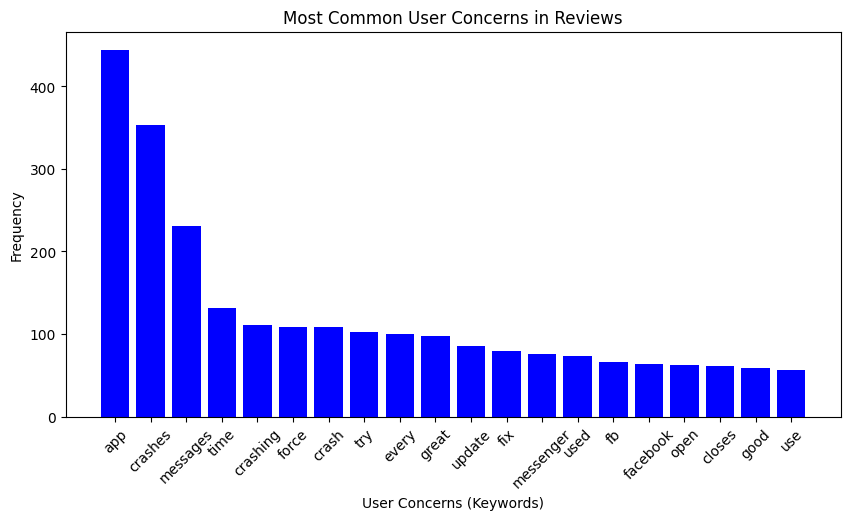

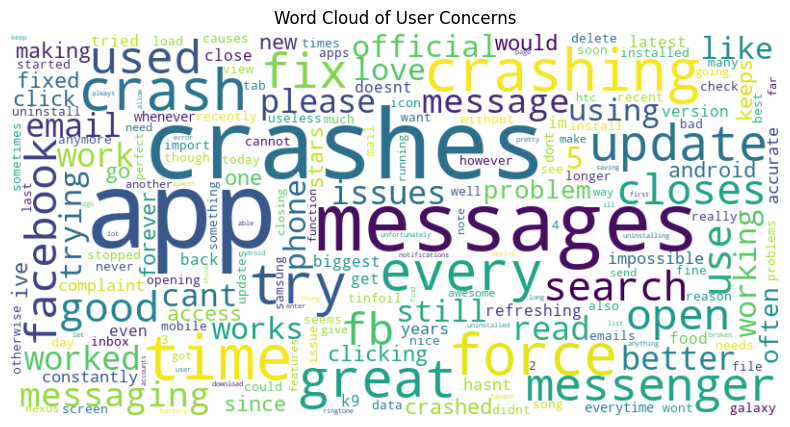

User concern analysis completed! Results saved as 'Top_User_Concerns.csv'.


In [16]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Ensure stopwords are downloaded
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# Load the cleaned dataset
cleaned_file_path = "cleaned_LLT.csv"
df_cleaned = pd.read_csv(cleaned_file_path, encoding="ISO-8859-1")

# Extract all reviews into a single text blob
all_reviews = " ".join(df_cleaned["review"])

# Tokenize words and remove stopwords
words = [word for word in all_reviews.split() if word not in stop_words]

# Count word frequency
word_counts = Counter(words)
top_words = word_counts.most_common(20)  # Get top 20 most frequent words

# Convert to DataFrame for saving
df_top_words = pd.DataFrame(top_words, columns=["Word", "Frequency"])
df_top_words.to_csv("Top_User_Concerns.csv", index=False, encoding="utf-8")

# Plot bar chart for word frequency
plt.figure(figsize=(10, 5))
plt.bar(*zip(*top_words), color="blue")
plt.xlabel("User Concerns (Keywords)")
plt.ylabel("Frequency")
plt.title("Most Common User Concerns in Reviews")
plt.xticks(rotation=45)
plt.show()

# Generate and display a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of User Concerns")
plt.show()

print("User concern analysis completed! Results saved as 'Top_User_Concerns.csv'.")